In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### How many males and females participated in the test

In [5]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

### What do you think about the students' parental level of education?

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='gender,parental level of education'>

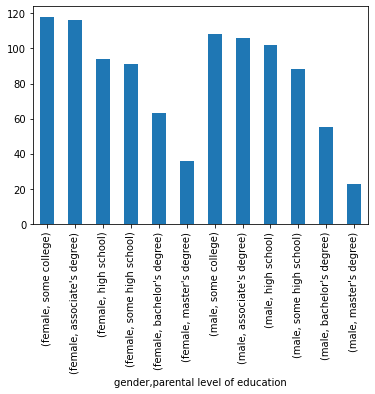

In [9]:
data.groupby('gender').agg('parental level of education').value_counts().plot(kind='bar', x='parental level of education', y='Count')

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

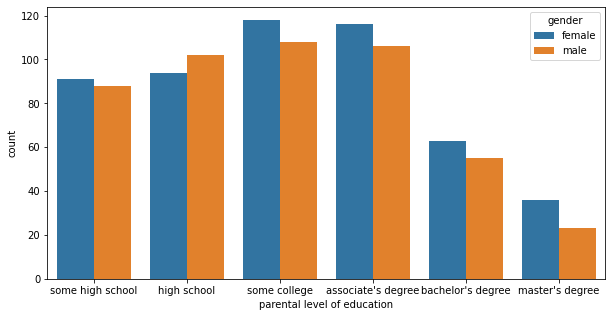

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x="parental level of education", data=data,hue='gender')

Most parents education is high school and least no.of parents have masters degree.

In [11]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

### Who scores the most on average for math, reading and writing based on
1)Gender

In [12]:
df=data[['gender','math score','reading score','writing score']].groupby('gender').mean()
df

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


Females have better reading and writing averages, while males are good in math.

2)Test preparation course

In [14]:
df1=data[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').mean()
df1

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Students completed the test preparation course have better scores in every subject than those who didn't attend the course.

### Scoring variation for math, reading and writing based on
1) Gender

In [18]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [19]:
df2=data[['gender','math score','reading score','writing score']].groupby('gender').std()
df2

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


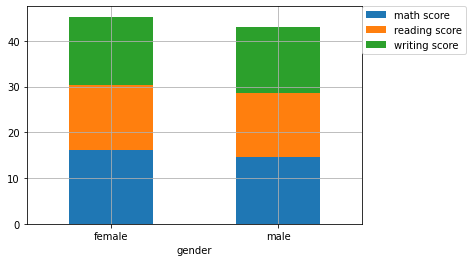

In [20]:
df2.plot.bar(stacked=True,grid=True)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1, 1), loc=0, borderaxespad=0.);

Variation of scores for math, reading and writing is least for males.

2)Test preparation course

In [23]:
df3=data[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').std()
df3

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


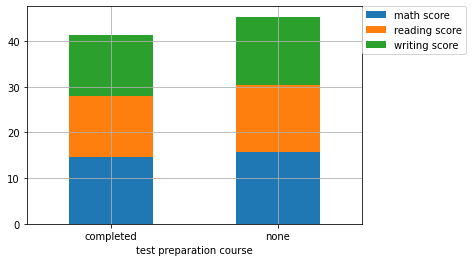

In [25]:
df3.plot.bar(stacked=True,grid=True)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1, 1), loc=0, borderaxespad=0.);

Students who completed the course of test preparation shows less variation compared to others.

### The management needs your help to give bonus points to the top 25% of students based on their maths score,so how will you help the management to achieve this.

In [29]:
top_25=data['math score'].quantile(q=0.75)
data_math=data.loc[data['math score'] >= top_25]
data_math

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
